In [1]:
import networkx as nx
from pylab import rcParams

In [4]:
rcParams['figure.figsize'] = 12, 12
G = nx.read_gml('lesmiserables.gml')

In [5]:
G8 = G.copy()
dn = nx.degree(G8)

In [8]:
for n in G8.nodes():
    if dn[n] <= 8:
        G8.remove_node(n)

RuntimeError: dictionary changed size during iteration

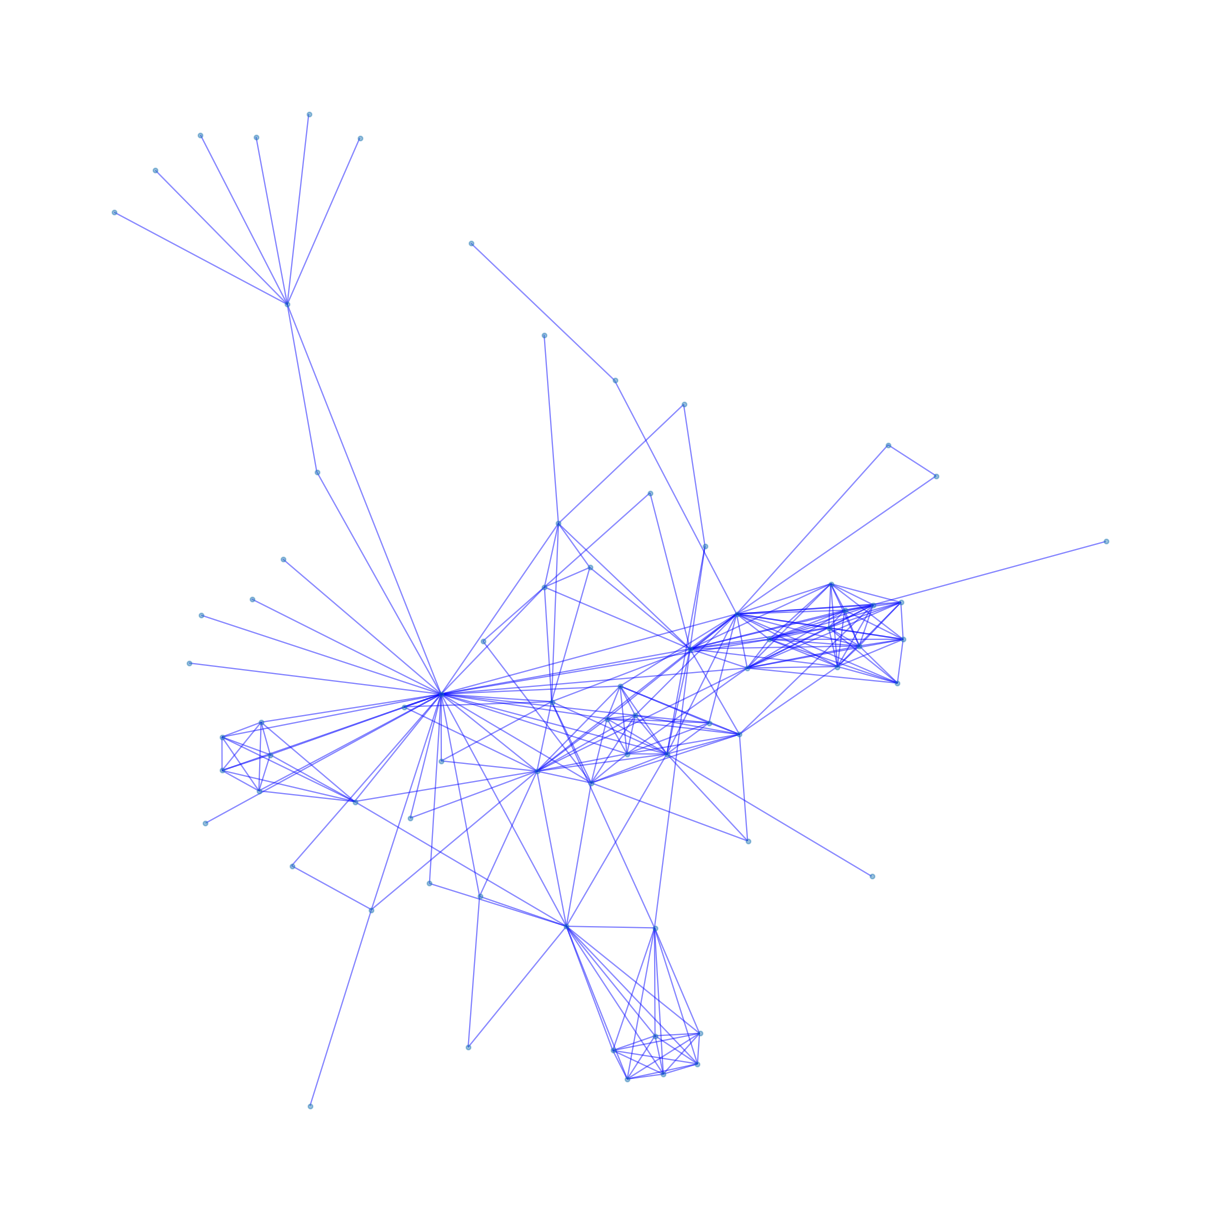

In [9]:
pos = nx.spring_layout(G8)
nx.draw(G8, node_size=10, edge_color='b', alpha=0.45, font_size=9, pos=pos)

In [18]:
def valuegetter(*values):
    if len(values) == 1:
        item = values[0]
        def g(obj):
            return obj[item]
    else:
        def g(obj):
            return tuple(obj[item] for item in values)
    return g

def clustering_coefficient(G, vertex):
    neighbors = G[vertex].keys()
    if len(neighbors) ==1: return -1.0
    links = 0
    for node in neighbors:
        for u in neighbors:
            if u in G[node]: links += 1
    ccoeff=2.0*links/len(neighbors)*(len(neighbors)-1)
    return links, len(neighbors), ccoeff

def calculate_centrality(G):
    degc = nx.degree_centrality(G)
    nx.set_node_attributes(G,'degree_cent', degc)
    degc_sorted = sorted(degc.items(), key=valuegetter(1), reverse=True)
    for key, value in degc_sorted[0:10]:
        print("Degree Centrality", key, value)
    return G, degc


In [19]:
print("Valjean", clustering_coefficient(G8,"Valjean"))
print("Marius", clustering_coefficient(G8,"Marius"))
print("Gavroche", clustering_coefficient(G8,"Gavroche"))
print("Babet", clustering_coefficient(G8,"Babet"))
print("Eponine", clustering_coefficient(G8,"Eponine"))
print("Courfeyrac", clustering_coefficient(G8,"Courfeyrac"))
print("Comeferre", clustering_coefficient(G8,"Combeferre"))
calculate_centrality(G8)

Valjean (148, 35, 287.54285714285714)
Marius (114, 19, 216.0)
Gavroche (164, 22, 313.09090909090907)
Babet (72, 10, 129.6)
Eponine (50, 11, 90.90909090909092)
Courfeyrac (118, 13, 217.84615384615384)
Comeferre (102, 11, 185.45454545454547)


TypeError: unhashable type: 'dict'